#**DESARROLLO: TALLER 2**
##**Comunicaciones I - E1 - Grupo B**

###**Integrantes:**


*   Nohelia Agudelo Cuervo - 2210413
*   Jaiver Josept Buitrago Graterón - 2204277
*   Fabián Camilo Chacón Vargas - 2214192



---



### Para todos los puntos aquí enunciados, se obtendrán tanto G, como a de la siguiente manera:

'G' es el **dígito final de la suma de los últimos dígitos de los códigos** de los integrantes del grupo.

    3 + 7 + 2 = 12

'a' es la **mediana de los dígitos del código de todos** los integrantes del grupo.

      [2,2,1,0,4,1,3,2,2,0,4,2,7,7,2,2,1,4,1,9,2]
      => Me = 2

Por lo anterior, **G = 2** y **a = 2**.


In [2]:
G = 2
a = 2



---



# **Punto 1 – Ruido Gaussiano y Ancho de Banda**

**Situación:** En sistemas de monitoreo remoto, las señales enviadas por los sensores pueden estar afectadas por ruido o interterferencia de otros equipos. Sin un filtrado adecuado, la señal útil puede perderse o volverse poco confiable. Ante esta situación, un receptor SDR recibe una señal con ruido blanco gaussiano, el cual pasa por un filtro de entrada LTI.



---



## **1.** Simule una señal de ruido blanco gaussiano (media 0, varianza 1). Utilice la convolución recursiva de una ventana cuadrada (10 + G muestras). Si genera este algoritmo, debería poder verificar que tal ventana es una función de densidad de probabilidad uniforme. Calcule la función densidad de probabilidad de la señal filtrada. Explique cómo cambia la varianza de la señal filtrada y compare con la varianza del ruido.



## **Señal de ruido**

La definición de la señal aleatoria de entrada X(n) y su respectiva salida Y(n) se da a partir del código propuesto en la guía del taller. Véase las siguientes aclaraciones:


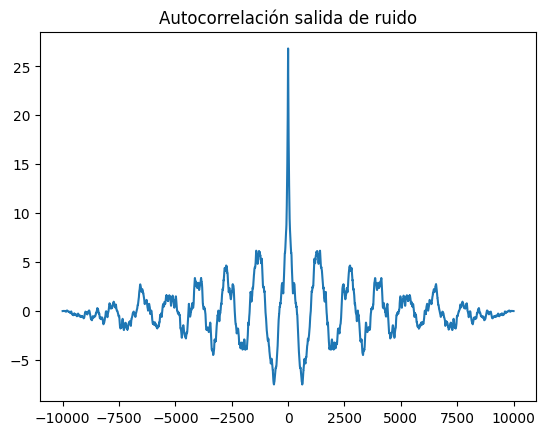

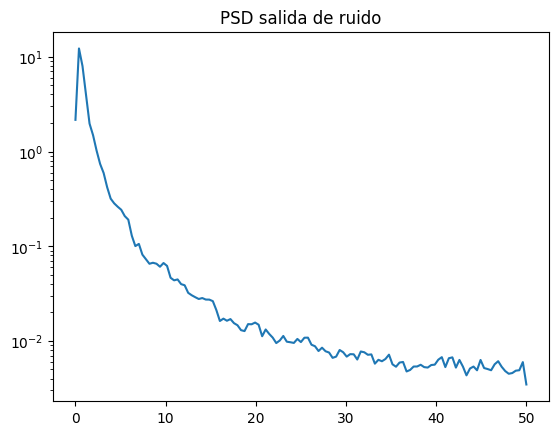

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import lfilter, correlate, welch

def calcular_autocorrelacion(y, A):                   # Calcula la autocorrelación de la señal filtrada
    autocorr = correlate(y, y, mode='full') / A       # y normaliza por el número de muestras
    lags = np.arange(-A + 1, A)
    return lags, autocorr

def graficar_autocorrelacion(lags, autocorr):         # Gráfica de autocorrelación
    plt.figure()
    plt.plot(lags, autocorr)
    plt.title("Autocorrelación salida de ruido")

def graficar_psd(f, Pxx):                             # Gráfica de PSD
    plt.figure()
    plt.semilogy(f, Pxx)
    plt.title("PSD salida de ruido")

A = 10000                     # Tamaño de la señal aleatoria

x = np.random.normal(0, 1, A) # Señal de ruido blanco gaussiano de longitud A

t = np.arange(0, 10, 0.01)    # Vector de tiempo de 0[s] a 10[s] con pasos de

                              # 0.01[s] (es decir, 1000 muestras)
h = np.exp(-a*t)              # Respuesta al impulso del filtro exponencial

y = lfilter(h, [1], x)        # Aplica un filtro FIR con coeficientes h a la
                              # señal aleatoria x, produciendo la señal filtrada y

lags, autocorr = calcular_autocorrelacion(y, A)     # Calcula la autocorrelación de la señal filtrada
                                                    # y normaliza por el número de muestras

f, Pxx = welch(y, fs=100)                           # Estima la PSD usando el método de Welch, con
                                                    # frecuencia de muestreo de 100[Hz]

graficar_autocorrelacion(lags, autocorr)            # Gráfica de autocorrelación

graficar_psd(f, Pxx)                                # Gráfica de PSD

plt.show()


### **Función de densidad de probabilidad (PDF) de la señal de ruido**

Posteriormente, se crea un algortimo que grafique la función de densidad de probabilidad para la señal aleatoria inicial de ruido. Será de ayuda para posteriormente comparar resultados.

Desviación estándar: 5.171237254131061
Media: 0.29810545176509856
Varianza: 26.74169473851295


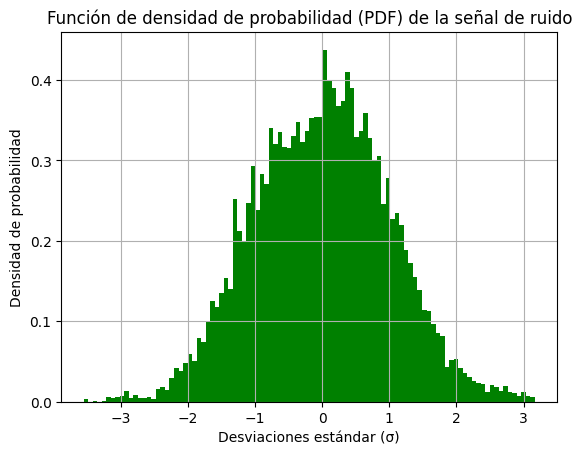

In [13]:
def calcular_estadisticas(y):
    std_y = np.std(y)                       # Verificación del valor de desviación estándar
    media_y = np.mean(y)                    # Verificación del valor de la media
    var_y = np.var(y)                       # Verificación del valor de la varianza
    return std_y, media_y, var_y

def graficar_pdf(y_n):
    plt.figure()
    plt.hist(y_n, bins=100, density=True, color='g')
    plt.xlabel("Desviaciones estándar (σ)")
    plt.ylabel("Densidad de probabilidad")
    plt.title("Función de densidad de probabilidad (PDF) de la señal de ruido")
    plt.grid()
    plt.show()


std_y, media_y, var_y = calcular_estadisticas(y)
print(f"Desviación estándar: {std_y}")
print(f"Media: {media_y}")
print(f"Varianza: {var_y}")

y_n = (y - np.mean(y))/np.std(y)            # Normalización de la señal (en términos de desviación estándar)

graficar_pdf(y_n)

## **Señal convolucionada con ventana cuadrada**

La definición de la señal aleatoria de entrada X(n) se mantiene, pero ahora su convolución será con una ventana cuadrada de 10 + G muestras (en nuestro caso, 12 muestras), de la cual se pudo confirmar que es una función de densidad de probabilidad uniforme. Esto da como resultado una nueva salida Y(n) con mayor suavidad con respecto a la señal de entrada.


In [6]:
ventana = np.ones(10+G)/(10+G)                          # Ventana cuadrada de 12 muestras (normalizada)

print(f"Suma de la ventana: {np.sum(ventana)}")         # Verificación de que la ventana es una
                                                        # PDF uniforme (debe dar 1)

y_conv = np.convolve(x, ventana, mode='valid')          # Convolución (nueva Y)


Suma de la ventana: 1.0


### **Función de densidad de probabilidad (PDF) de la señal convolucionada**

 Además de obtener un mayor suavizado, se logra un valor de varianza menor, puesto que la convolución actúa como un filtrado que atenúa altas frecuencias.

Desviación estándar: 0.2888410018393924
Media: 0.005625394660557847
Varianza: 0.08342912434358388


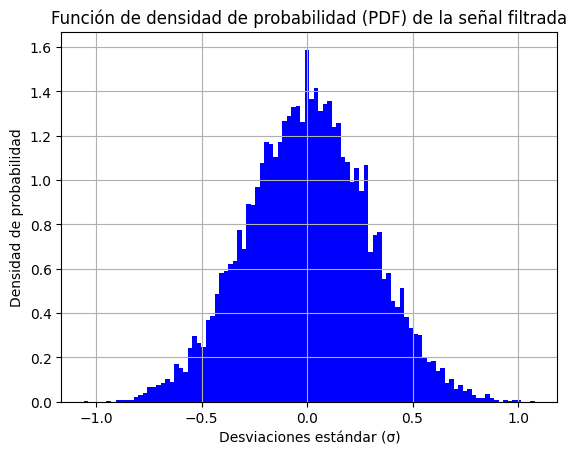

In [10]:
std_yc, media_yc, var_yc = calcular_estadisticas(y_conv)

print(f"Desviación estándar: {std_yc}")     # Verificación del valor de desviación estándar

print(f"Media: {media_yc}")                 # Verificación del valor de la media
                                            # (que debe ser cercana a 0)

print(f"Varianza: {var_yc}")                # Verificación del valor de la varianza
                                            # (que debe ser menor que 1)
def graficar_pdf_conv(y_conv):
  plt.figure()
  plt.hist(y_conv, bins=100, density=True, color='blue')
  plt.xlabel("Desviaciones estándar (σ)")
  plt.ylabel("Densidad de probabilidad")
  plt.title("Función de densidad de probabilidad (PDF) de la señal filtrada")
  plt.grid()
  plt.show()

graficar_pdf_conv(y_conv)                   # Gráfica de PDF


## **Conclusión**

Como se mencionó previamente, la **varianza de la señal filtrada** con la
convolución de una ventana cuadrada cambia de modo que **su valor disminuye**. Inicialmente, teníamos una varianza grande en la señal de ruido, pero al convolucionar X(n) con la ventana, obtenemos una varianza cercana a 0.08. Esto es debido a que **se obtiene a la salida** una señal Y(n) que atenúa altas frecuencias, viéndose así como **una señal con mayor suavidad.**
   




---



## **2.** La señal pasa a través de un filtro LIT con respuesta al impulso h(t) = e^(−at)u(t). Determine la densidad espectral de potencia de la señal de ruido filtrada.


En realidad, el cambio:

    h(t) = e^(−at) => h(t) = e^(−at)u(t)

no afecta el resultado de la gráfica correspondiente al PSD (ni a la autocorrelación). Lo anterior es debido a que al definir Y(n) con *lfilter* se usa un vector de tiempo (t) con tiempos positivos que van de 0[s] a 10[s].

## **Caso 1: PSD resultante con u(t) y valores positivos de t**

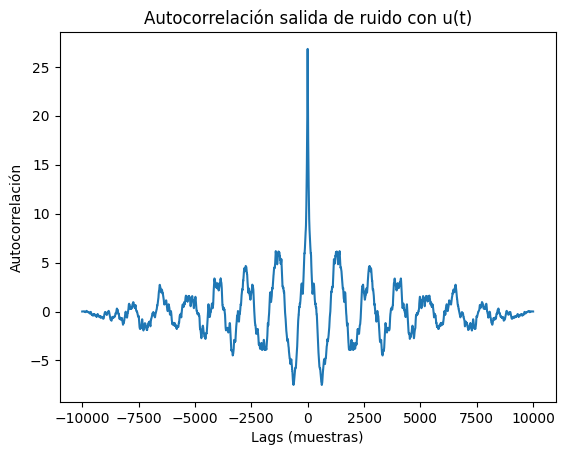

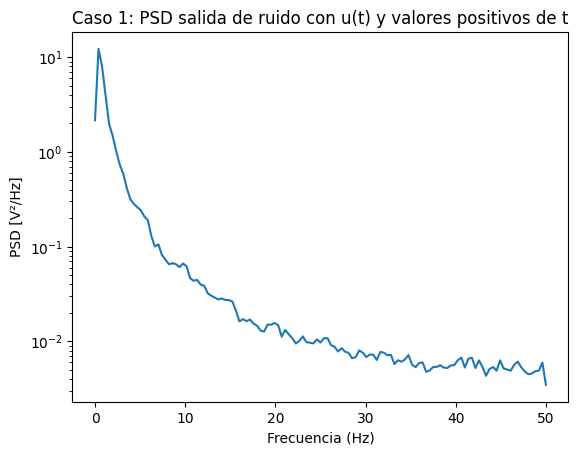

In [28]:
def graficar_autocorrelacion_c1(lags2, autocorr2):         # Gráfica de autocorrelación
    plt.figure()
    plt.plot(lags2, autocorr2)
    plt.xlabel("Lags (muestras)")
    plt.ylabel("Autocorrelación")
    plt.title("Autocorrelación salida de ruido con u(t)")

def graficar_psd_c1(f2, Pxx2):                             # Gráfica de PSD
    plt.figure()
    plt.semilogy(f2, Pxx2)
    plt.xlabel("Frecuencia (Hz)")
    plt.ylabel("PSD [V²/Hz]")
    plt.title("Caso 1: PSD salida de ruido con u(t) y valores positivos de t")


u = np.heaviside(t, 1)        # Definición de u(t)

h2 = np.exp(-a*t)*u           # Respuesta al impulso del filtro exponencial
                              # multiplicado por u(t)

y2 = lfilter(h2, [1], x)      # Aplica un filtro FIR con coeficientes h a la
                              # señal aleatoria x, produciendo la señal filtrada y

lags2, autocorr2 = calcular_autocorrelacion(y2, A)        # Calcula la autocorrelación de la señal filtrada
                                                          # y normaliza por el número de muestras

f2, Pxx2 = welch(y2, fs=100)  # Estima la PSD usando el método de Welch, con
                              # frecuencia de muestreo de 100[Hz]


graficar_autocorrelacion_c1(lags2, autocorr2)             # Gráfica de autocorrelación

graficar_psd_c1(f2, Pxx2)                                 # Gráfica de PSD

plt.show()


Veamos qué sucedería para un valor diferente de **t que sí incluya valores negativos**.

## **Caso 2: PSD resultante sin u(t) y con valores negativos de t**

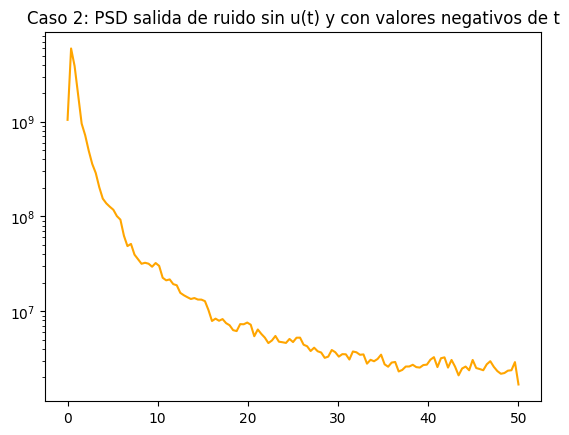

In [18]:
def graficar_autocorrelacion_c2(lags2_sola, autocorr2_sola):        # Gráfica de autocorrelación
    plt.figure()
    plt.plot(lags2_sola, autocorr2_sola)
    plt.title("Autocorrelación salida de ruido sin u(t) y con valores negativos de t")

def graficar_psd_c2(f2_sola, Pxx2_sola):                            # Gráfica de PSD
    plt.figure()
    plt.semilogy(f2_sola, Pxx2_sola, color = 'orange')
    plt.title("Caso 2: PSD salida de ruido sin u(t) y con valores negativos de t")


t_n = np.arange(-5, 10, 0.01)         # Nuevo vector de tiempo que incluye negativos

h2_sola = np.exp(-a*t_n)              # Respuesta al impulso del filtro exponencial

y2_sola = lfilter(h2_sola, [1], x)    # Aplica un filtro FIR con coeficientes h a la
                                      # señal aleatoria x, produciendo la señal filtrada y

lags2_sola, autocorr2_sola = calcular_autocorrelacion(y2_sola, A)   # Calcula la autocorrelación de la señal filtrada
                                                                    # y normaliza por el número de muestras

f2_sola, Pxx2_sola = welch(y2_sola, fs=100)                         # Estima la PSD usando el método de Welch, con
                                                                    # frecuencia de muestreo de 100[Hz]

# graficar_autocorrelacion_c2(lags2_sola, autocorr2_sola)           # Gráfica de autocorrelación

graficar_psd_c2(f2_sola, Pxx2_sola)                                 # Gráfica de PSD

plt.show()

## **Caso 3: PSD resultante con u(t) y valores negativos de t**

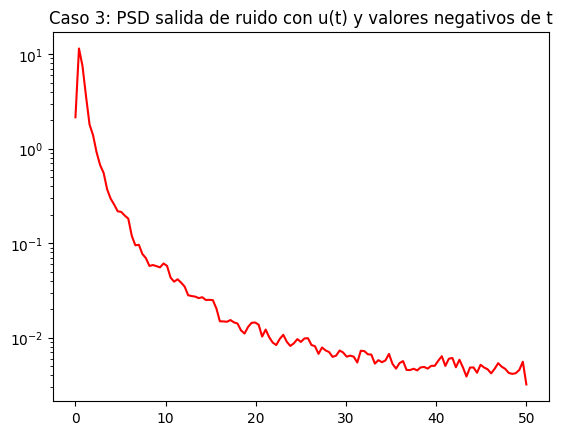

In [22]:
def graficar_autocorrelacion_c3(lags2_u, autocorr2_u):        # Gráfica de autocorrelación
    plt.figure()
    plt.plot(lags2_u, autocorr2_u)
    plt.title("Autocorrelación salida de ruido con u(t) y con valores negativos de t")

def graficar_psd_c3(f2_u, Pxx2_u):                            # Gráfica de PSD
    plt.figure()
    plt.semilogy(f2_u, Pxx2_u, color = 'r')
    plt.title("Caso 3: PSD salida de ruido con u(t) y valores negativos de t")


u_n = np.heaviside(t_n, 1)            # Definición de u(t)

h2_u = np.exp(-a*t_n)*u_n             # Respuesta al impulso del filtro exponencial

y2_u = lfilter(h2_u, [1], x)          # Aplica un filtro FIR con coeficientes h a la
                                      # señal aleatoria x, produciendo la señal filtrada y

lags2_u, autocorr2_u = calcular_autocorrelacion(y2_u, A)      # Calcula la autocorrelación de la señal filtrada
                                                              # y normaliza por el número de muestras

f2_u, Pxx2_u = welch(y2_u, fs=100)    # Estima la PSD usando el método de Welch, con
                                      # frecuencia de muestreo de 100[Hz]


# graficar_autocorrelacion_c3(lags2_u, autocorr2_u)           # Gráfica de autocorrelación

graficar_psd_c3(f2_u, Pxx2_u)                                 # Gráfica de PSD

plt.show()

## **Conclusiones**

*   Como se mencionó anteriormente, cambiar h(t) = e^(−at) a h(t) = e^(−at)u(t) **no afecta el resultado de la gráfica** de la PSD en lo absoluto, ya que desde el inicio se definió Y(n) dependiente de un vector de tiempo (t) con valores positivos que van de 0[s] a 10[s]. Por ende, si se deseaba ver un cambio más notable en las gráficas, había que variar t de modo que abarcara números negativos.
*   Dado que inicialmente (caso 1) había sido definido t como un vector de valores positivos, el sistema por defecto ya era **causal**, puesto que se puede confirmar la causalidad si su repuesta al impulso h(t) es cero para tiempos negativos:

        h(t) = 0, ∀t < 0

  Como t solo estaba compuesto por valores positivos, entonces h(t) era cero bajo dicha condición.

  Al usar **h(t) = e^(−at)** y **valores negativos** para el vector t (caso 2), el sistema se convierte en **no causal**, pues h(t) ≠ 0 para t < 0; en contraste, el caso 3 demuestra que al **multiplicar el u(t)** en h(t) garantiza que h(t) = 0 para t < 0, lo que implica que el sistema sea **causal**.
  
  Por lo anterior, se explica así el por qué las gráficas de los casos 1 y 3 son iguales, y el caso 2 es diferente por sus valores en el eje Y.


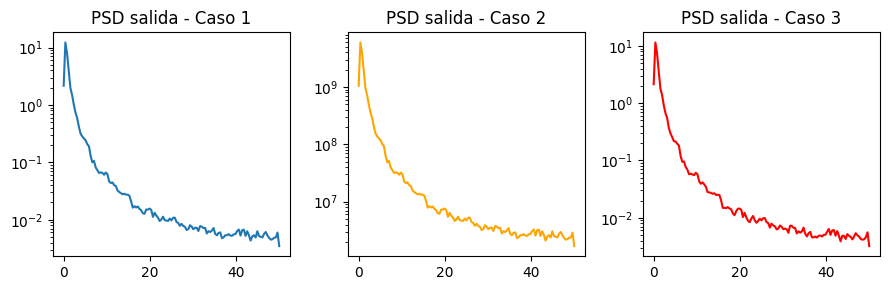

In [24]:
def graficar_psd_casos(f2, Pxx2, f2_sola, Pxx2_sola, f2_u, Pxx2_u):

    fig, axes = plt.subplots(1, 3, figsize=(9, 3))   # Ajuste del tamaño de las imágenes

    axes[0].semilogy(f2, Pxx2)
    axes[0].set_title("PSD salida - Caso 1")

    axes[1].semilogy(f2_sola, Pxx2_sola, color = 'orange')
    axes[1].set_title("PSD salida - Caso 2")

    axes[2].semilogy(f2_u, Pxx2_u, color = 'r')
    axes[2].set_title("PSD salida - Caso 3")

    plt.tight_layout()                               # Ajuste adicional para los subplots
    plt.show()

graficar_psd_casos(f2, Pxx2, f2_sola, Pxx2_sola, f2_u, Pxx2_u)





---



## **3.** Estime y grafique la autocorrelación y PSD tanto de la entrada como de la salida. Haga cambios en la media y la varianza para argumentar sus resultados.

Se toma como referencia el **caso 1** del inciso anterior (pues los casos 2 y 3 fueron desarrollados solo con fines demostrativos).


## **Autocorrelaciones de entrada y salida**

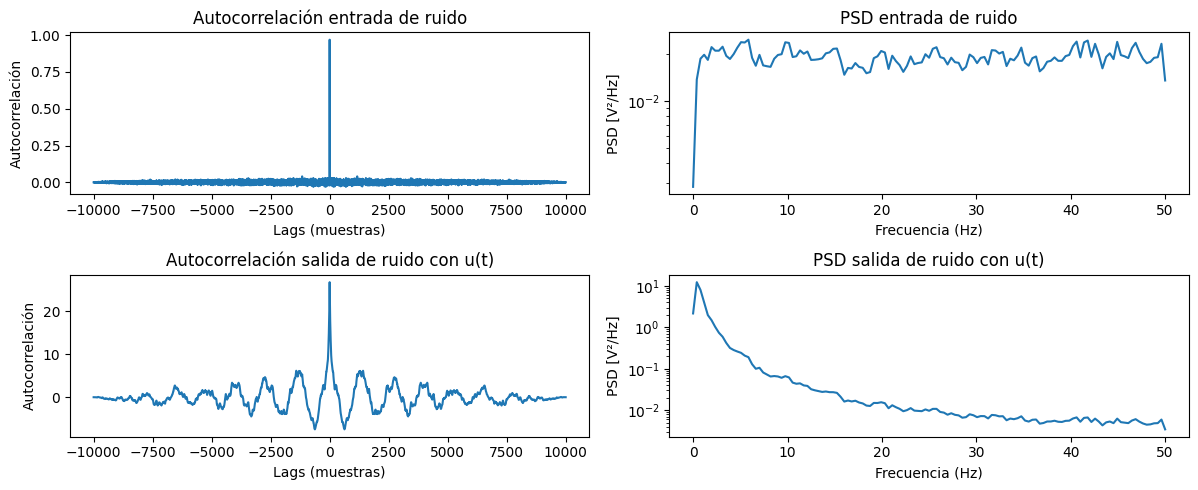

In [27]:
def graficar_compara_auto_psd(lags_x, autocorr_x, f_x, Pxx_x,
                                             lags_y, autocorr_y, f_y, Pxx_y):

    fig, axes = plt.subplots(2, 2, figsize=(12, 5))           # Ajuste del tamaño de las imágenes

    axes[0, 0].plot(lags_x, autocorr_x)                       # Gráfica de autocorrelación de la entrada
    axes[0, 0].set_xlabel("Lags (muestras)")
    axes[0, 0].set_ylabel("Autocorrelación")
    axes[0, 0].set_title("Autocorrelación entrada de ruido")

    axes[0, 1].semilogy(f_x, Pxx_x)                           # Gráfica de PSD de la entrada
    axes[0, 1].set_xlabel("Frecuencia (Hz)")
    axes[0, 1].set_ylabel("PSD [V²/Hz]")
    axes[0, 1].set_title("PSD entrada de ruido")

    axes[1, 0].plot(lags_y, autocorr_y)                       # Gráfica de autocorrelación de la salida
    axes[1, 0].set_xlabel("Lags (muestras)")
    axes[1, 0].set_ylabel("Autocorrelación")
    axes[1, 0].set_title("Autocorrelación salida de ruido con u(t)")

    axes[1, 1].semilogy(f_y, Pxx_y)                           # Gráfica de PSD de la salida
    axes[1, 1].set_xlabel("Frecuencia (Hz)")
    axes[1, 1].set_ylabel("PSD [V²/Hz]")
    axes[1, 1].set_title("PSD salida de ruido con u(t)")

    plt.tight_layout()
    plt.show()


u = np.heaviside(t, 1)                            # Definición de u(t)

h2 = np.exp(-a*t)*u                               # Respuesta al impulso del filtro exponencial
                                                  # multiplicado por u(t)

y2 = lfilter(h2, [1], x)                          # Aplica un filtro FIR con coeficientes h a la
                                                  # señal aleatoria x, produciendo la señal filtrada y

# Cálculos para la entrada

lags_x, autocorr_x = calcular_autocorrelacion(x, A)
f_x, Pxx_x = welch(x, fs=100)

# Cálculos para la salida

lags2, autocorr2 = calcular_autocorrelacion(y2, A)
f2, Pxx2 = welch(y2, fs=100)

graficar_compara_auto_psd(lags_x, autocorr_x, f_x, Pxx_x,
                                             lags2, autocorr2, f2, Pxx2)

## **Autocorrelaciones de entrada y salida con media modificada**

Realmente, una manera simple para modificar la media podría ser sencillamente cambiar el primer parámetro en la definición de la señal de entrada X:

    x = np.random.normal(media, 1, A)

Sin embargo, debido a que las señales generadas para X son aleatorias, no se implementa esta nueva línea de código ya que se estaría creando una señal de entrada diferente, por lo que no se podría comparar con la señal anteriormente mostrada (la original). Es por ello que se implementa en código una traslación en X de acuerdo con el valor de la media (μ):

    x ~ N(0,1) => x + μ ~ N(μ,1)
    

Media de la entrada original: 0.0055950106140903975
Media de la salida original: 0.29810545176509856
Media de la entrada modificada: 1.0055950106140905
Media de la salida modificada: 50.54978034732018


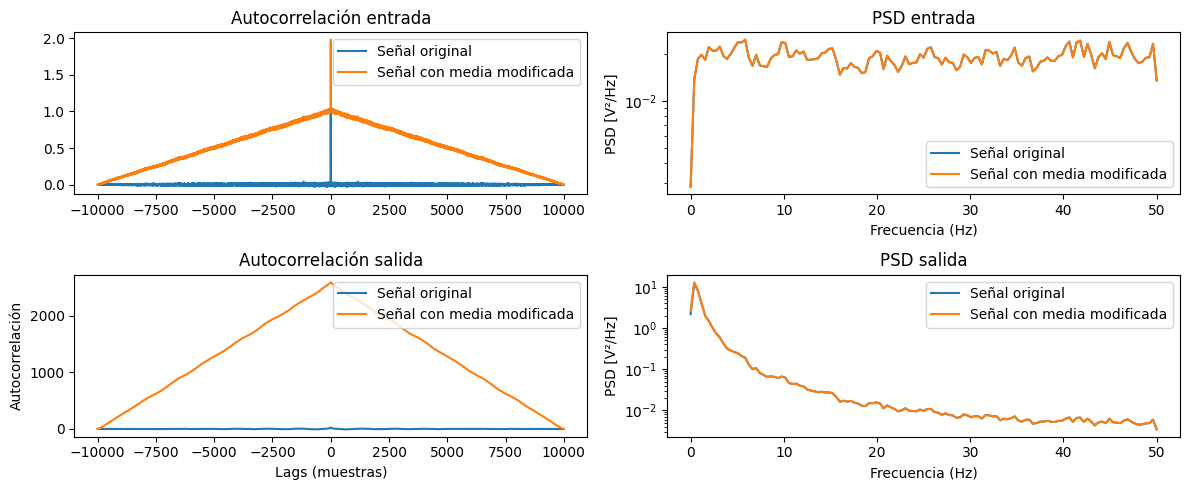

In [58]:
def graficar_compara_auto_psd_media(lags_x, autocorr_x_media, f_x_media, Pxx_x_media,
                                             lags2, autocorr2_media, f2_media, Pxx2_media):

    fig, axes = plt.subplots(2, 2, figsize=(12, 5))               # Ajuste del tamaño de las imágenes

    axes[0, 0].plot(lags_x, autocorr_x, label="Señal original")   # Gráfica de autocorrelación de la entrada
    axes[0, 0].plot(lags_x, autocorr_x_media, label="Señal con media modificada")
    axes[0, 0].set_title("Autocorrelación entrada")
    axes[0, 0].legend()

    axes[0, 1].semilogy(f_x, Pxx_x, label="Señal original")       # Gráfica de PSD de la entrada
    axes[0, 1].semilogy(f_x_media, Pxx_x_media, label="Señal con media modificada")
    axes[0, 1].set_xlabel("Frecuencia (Hz)")
    axes[0, 1].set_ylabel("PSD [V²/Hz]")
    axes[0, 1].set_title("PSD entrada")
    axes[0, 1].legend()

    axes[1, 0].plot(lags2, autocorr2, label="Señal original")     # Gráfica de autocorrelación de la salida
    axes[1, 0].plot(lags2, autocorr2_media, label="Señal con media modificada")
    axes[1, 0].set_xlabel("Lags (muestras)")
    axes[1, 0].set_ylabel("Autocorrelación")
    axes[1, 0].set_title("Autocorrelación salida")
    axes[1, 0].legend()

    axes[1, 1].semilogy(f2, Pxx2, label="Señal original")         # Gráfica de PSD de la salida
    axes[1, 1].semilogy(f2_media, Pxx2_media, label="Señal con media modificada")
    axes[1, 1].set_xlabel("Frecuencia (Hz)")
    axes[1, 1].set_ylabel("PSD [V²/Hz]")
    axes[1, 1].set_title("PSD salida")
    axes[1, 1].legend()

    plt.tight_layout()
    plt.show()

def calcular_medias_original(x, y):
    mediaXN = np.mean(x)                                          # Verificación del valor de la media
    print(f"Media de la entrada original: {mediaXN}")             # de la señal de entrada original

    mediaYN = np.mean(y2)                                         # Verificación del valor de la media
    print(f"Media de la salida original: {mediaYN}")              # de la señal de salida original

    return mediaXN, mediaYN

def calcular_medias_mod(x_media, y2_media):
    media_x = np.mean(x_media)                                    # Verificación del valor de la media
    print(f"Media de la entrada modificada: {media_x}")           # de la señal de entrada modificada

    media_y = np.mean(y2_media)                                   # Verificación del valor de la media
    print(f"Media de la salida modificada: {media_y}")            # de la señal de salida modificada

    return media_x, media_y

media = 1                                                         # Ajuste de la media

calcular_medias_original(x, y2)                                   # Medias de la señal de entrada y salida
                                                                  # originales

# Cálculos para la entrada

x_media = x + media                                               # Para hacer la comparación con la
                                                                  # señal de X graficada anteriormente

lags_x, autocorr_x_media = calcular_autocorrelacion(x_media, A)
f_x_media, Pxx_x_media = welch(x_media, fs=100)


# Cálculos para la salida

y2_media = lfilter(h2, [1], x_media)

lags_x, autocorr2_media = calcular_autocorrelacion(y2_media, A)
f2_media, Pxx2_media = welch(y2_media, fs=100)


calcular_medias_mod(x_media, y2_media)                            # Medias de la señal de entrada y salida
                                                                  # originales

graficar_compara_auto_psd_media(lags_x, autocorr_x_media, f_x_media, Pxx_x_media,
                                             lags2, autocorr2_media, f2_media, Pxx2_media)


## **Autocorrelaciones de entrada y salida con varianza modificada**

Análogo al caso anterior, una manera simple para modificar la varianza podría ser sencillamente cambiar el segundo parámetro en la definición de la señal de entrada X:

    x = np.random.normal(0, varianza, A)

Sin embargo, debido a que las señales generadas para X son aleatorias, no se implementa esta nueva línea de código ya que se estaría creando una señal de entrada diferente, por lo que no se podría comparar con las señales anteriormente mostradas. Es por ello que se implementa en código una escalación en X de acuerdo con el valor de la desviación estándar (σ) para cambiar la varianza (σ^2):

    x ~ N(0,1) => x * σ ~ N(0,σ^2)
    

Varianza de la entrada original: 0.9690665720933316
Varianza de la salida original: 26.74169473851295
Varianza de la entrada modificada: 0.2422666430233329
Varianza de la salida modificada: 6.685423684628238


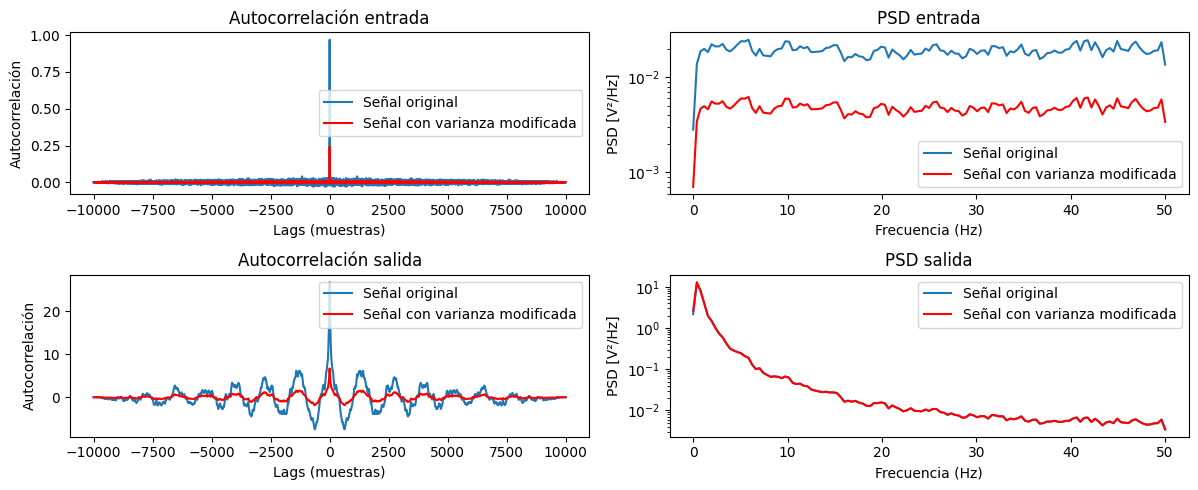

In [57]:
def graficar_compara_auto_psd_var(lags_x, autocorr_x_var, f_x_var, Pxx_x_var,
                                             lags2, autocorr2_var, f2_var, Pxx2_var):

    fig, axes = plt.subplots(2, 2, figsize=(12, 5))               # Ajuste del tamaño de las imágenes

    axes[0, 0].plot(lags_x, autocorr_x, label="Señal original")   # Gráfica de autocorrelación de la entrada
    axes[0, 0].plot(lags_x, autocorr_x_var, color = 'r', label="Señal con varianza modificada")
    axes[0, 0].set_xlabel("Lags (muestras)")
    axes[0, 0].set_ylabel("Autocorrelación")
    axes[0, 0].set_title("Autocorrelación entrada")
    axes[0, 0].legend()

    axes[0, 1].semilogy(f_x, Pxx_x, label="Señal original")       # Gráfica de PSD de la entrada
    axes[0, 1].semilogy(f_x_var, Pxx_x_var, color = 'r', label="Señal con varianza modificada")
    axes[0, 1].set_xlabel("Frecuencia (Hz)")
    axes[0, 1].set_ylabel("PSD [V²/Hz]")
    axes[0, 1].set_title("PSD entrada")
    axes[0, 1].legend()

    axes[1, 0].plot(lags2, autocorr2, label="Señal original")     # Gráfica de autocorrelación de la salida
    axes[1, 0].plot(lags2, autocorr2_var, color = 'r', label="Señal con varianza modificada")
    axes[1, 0].set_xlabel("Lags (muestras)")
    axes[1, 0].set_ylabel("Autocorrelación")
    axes[1, 0].set_title("Autocorrelación salida")
    axes[1, 0].legend()

    axes[1, 1].semilogy(f2, Pxx2, label="Señal original")         # Gráfica de PSD de la salida
    axes[1, 1].semilogy(f2_var, Pxx2_var, color = 'r', label="Señal con varianza modificada")
    axes[1, 1].set_xlabel("Frecuencia (Hz)")
    axes[1, 1].set_ylabel("PSD [V²/Hz]")
    axes[1, 1].set_title("PSD salida")
    axes[1, 1].legend()

    plt.tight_layout()
    plt.show()

def calcular_var_original(x, y):
    varXN = np.var(x)                                       # Verificación del valor de la varianza
    print(f"Varianza de la entrada original: {varXN}")      # de la señal de entrada original

    varYN = np.var(y2)                                      # Verificación del valor de la varianza
    print(f"Varianza de la salida original: {varYN}")       # de la señal de salida original

    return varXN, varYN

def calcular_var_mod(x_var, y2_var):
    var_xde = np.var(x_var)                                 # Verificación del valor de la varianza
    print(f"Varianza de la entrada modificada: {var_xde}")  # de la señal de entrada modificada

    var_yde = np.var(y2_var)                                # Verificación del valor de la varianza
    print(f"Varianza de la salida modificada: {var_yde}")   # de la señal de salida modificada

    return var_xde, var_yde


de = 0.5                                                    # Ajuste de la desviación estándar

calcular_var_original(x, y2)                                # Medias de la señal de entrada y salida
                                                            # originales

# Cálculos para la entrada

x_var = x*de                                                # Para hacer la comparación con la
                                                            # señal de X original

lags_x, autocorr_x_var = calcular_autocorrelacion(x_var, A)
f_x_var, Pxx_x_var = welch(x_var, fs=100)


# Cálculos para la salida

y2_var = lfilter(h2, [1], x_var)

lags_x, autocorr2_var = calcular_autocorrelacion(y2_var, A)
f2_var, Pxx2_var = welch(y2_media, fs=100)


calcular_var_mod(x_var, y2_var)                             # Medias de la señal de entrada y salida
                                                            # originales

graficar_compara_auto_psd_var(lags_x, autocorr_x_var, f_x_var, Pxx_x_var,
                                             lags2, autocorr2_var, f2_var, Pxx2_var)


## **Conclusiones**

Para la autocorrelación, se pudo comprobar lo siguiente:

*   La media de un ruido blanco gaussiano es cero. Sin embargo, al modificar este valor, la señal muestra un patrón triangular en la autocorrelación. Esto es debido a que el valor agregado de la media actúa como una componente determinista constante.
*   Cuando se modifica la varianza, se está escalando su energía. Si σ^2 < 1, los valores son más bajos con respecto a la original (σ^2 = 1), y si σ^2 > 1, los valores son más altos. Cabe resaltar, que esto no implica que su contenido espectral ni la tendencia de la forma de la gráfica también cambie. Solo se aplica un escalamiento.
*   Como el sistema es LTI, el efecto de la varianza se conserva en la salida también.
*   El pico alto representa también una potencia. Es decir, P = σ^2.


En cuanto a la densidad espectral de potencia (PSD), se puede afirmar que:


*   Al modificar la media de una señal, las gráficas de PSD se mantienen prácticamente iguales. Esto ocurre dado que no existe afectación en la PSD: la media solo añade una componente en DC, que muchas veces es filtrada en la estimación (como ocurre con el uso de *welch*).
*   Cambiar la varianza escala verticalmente la PSD. Si σ^2 < 1, la curva generada estará por debajo de la curva original (σ^2 = 1), y si σ^2 > 1, la curva generada estará por encima. Así como pasa en la autocorrelación, no se modifica la forma de la gráfica.




# **Punto 2 – Transformación de PDFs**

**Situación:** En un sistema de transmisión digital, un canal inalámbrico introduce una distorsión en la forma de los pulsos, afectando la estadística de la señal recibida. Para recuperar la señal original, se emplean filtros LTI que modifican la distribución de la señal de entrada. Es necesario estudiar cómo cambia la distribución probabilística luego del filtrado.



---



## **1.** Genere 10000 + G*100 muestras de X~ N(1,2^2).



Recordando que G = 2, veamos:

Media de la entrada original: 0.9985209232624633
Media de la salida original: 1.9960261910905097
Varianza de la entrada original: 4.073904242914702
Varianza de la salida original: 5.927746865439162


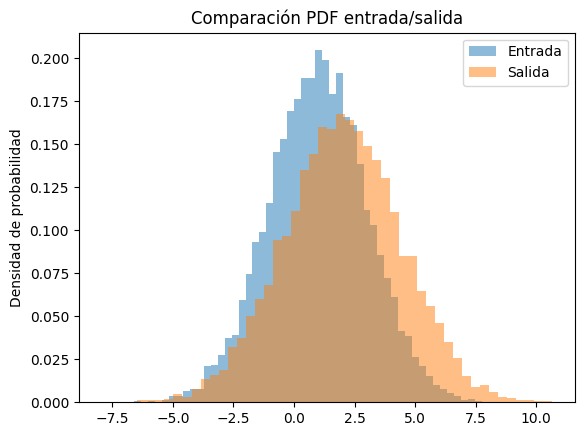

In [55]:
def calcular_medias_original(X, Y):
    mediaXG = np.mean(X)                                   # Verificación del valor de la media
    print(f"Media de la entrada original: {mediaXG}")      # de la señal de entrada original

    mediaYG = np.mean(Y)                                   # Verificación del valor de la media
    print(f"Media de la salida original: {mediaYG}")       # de la señal de salida original

    return mediaXG, mediaYG

def calcular_var_original(X, Y):
    varXG = np.var(X)                                      # Verificación del valor de la varianza
    print(f"Varianza de la entrada original: {varXG}")     # de la señal de entrada original

    varYG = np.var(Y)                                      # Verificación del valor de la varianza
    print(f"Varianza de la salida original: {varYG}")      # de la señal de salida original

    return varXG, varYG

def graficar_comparacion_pdf(X, Y):
    plt.figure()
    plt.hist(X, bins=50, density=True, alpha=0.5, label='Entrada')
    plt.hist(Y, bins=50, density=True, alpha=0.5, label='Salida')
    plt.legend()
    plt.ylabel("Densidad de probabilidad")
    plt.title("Comparación PDF entrada/salida")
    plt.show()


A_m = A + (G*100)                 # Nuevo tamaño de la señal aleatoria

X = np.random.normal(1, 2, A_m)   # Señal de distribución gaussiana de longitud A
                                  # con media = 1 y desviación estándar = 1

H = [1/a, 1, 1/a]                 # Respuesta al impulso finita del filtro
                                  # con coeficientes [0.5, 1, 0.5]

Y = lfilter(H, [1], X)            # Aplica un filtro FIR los coeficientes de H a la
                                  # señal aleatoria X, produciendo la señal filtrada Y

mediaXG, mediaYG = calcular_medias_original(X, Y)          # Varianzas de la señal de entrada y salida originales
varXG, varYG = calcular_var_original(X, Y)                 # Varianzas de la señal de entrada y salida originales


graficar_comparacion_pdf(X, Y)    # Gráfica de PDF


## **Conclusiones**


*   Si a tendiera al infinito, los valores de los coeficientes de los extremos de H tenderían a cero, de modo que:

        H = [1/a, 1, 1/a]
        H = [1/∞, 1, 1/∞] => H = [0, 1, 0]

  Lo anterior implica que la PDF de salida sería igual a la de entrada, pues realmente es como si no se estuviera haciendo ningún filtro, o dicho de otro modo, como si se estuviera convolucionando con 1.


*   Si a > 0, se verá un leve suavizado con un desfase hacia la derecha de la salida con respecto hacia la entrada (y viceversa con a < 0).



   




---



## **2.** Pase por un sistema LTI con h[k] = [1/a, 1,1/a] y luego aplique un filtro promedio simple de G muestras (puede variar el número de muestras si desea verificar la operación).



Recordando que G = 2, veamos:

Media de la entrada original: 0.9985209232624633
Varianza de la entrada original: 4.073904242914702
Media de la salida filtrada: 1.995698361103215
Varianza de la salida filtrada: 4.9213309862229035


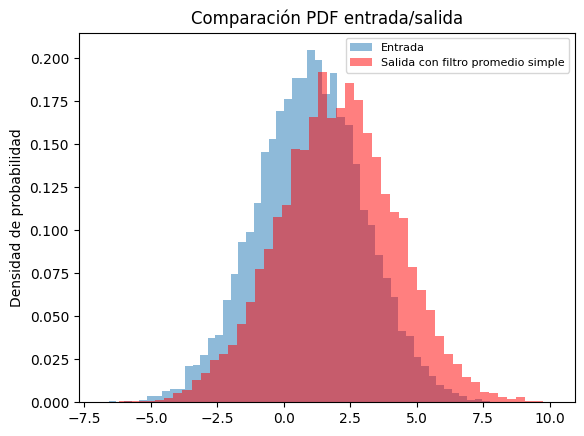

In [56]:
def calcular_medias_var_original(X):

    print(f"Media de la entrada original: {mediaXG}")          # de la señal de salida filtrada
    print(f"Varianza de la entrada original: {varXG}")         # de la señal de salida filtrada

    return mediaXG, varXG

def calcular_medias_var_fil(Y_filt):
    mediaYG_filt = np.mean(Y_filt)                             # Verificación del valor de la media
    print(f"Media de la salida filtrada: {mediaYG_filt}")      # de la señal de salida filtrada
    varYG_filt = np.var(Y_filt)                                # Verificación del valor de la varianza
    print(f"Varianza de la salida filtrada: {varYG_filt}")     # de la señal de salida filtrada

    return mediaYG_filt, varYG_filt

def graficar_comparacion_pdf(X, Y):
    plt.figure()
    plt.hist(X, bins=50, density=True, alpha=0.5, label='Entrada')
    plt.hist(Y_filt, bins=50, density=True, color='red', alpha=0.5, label='Salida con filtro promedio simple')
    plt.legend(fontsize=8)
    plt.ylabel("Densidad de probabilidad")
    plt.title("Comparación PDF entrada/salida")
    plt.show()


h_simple = np.ones(G)/(G)                                      # Filtro promedio de G muestras
Y_filt = lfilter(h_simple, [1], Y)                             # Filtrado (nueva Y)

mediaXG, varYG = calcular_medias_var_original(X)               # Medias de la señal de entrada originales

mediaYG_filt, varYG_filt = calcular_medias_var_fil(Y_filt)     # Medias de la señal de entrada y salida filtrada


graficar_comparacion_pdf(X, Y_filt)                            # Gráfica de PDF


## **Conclusión**


Al aplicar el filtro promedio simple, la varianza disminuirá su valor a la salida con respecto a la entrada original, ya que con el filtro se suaviza la señal. Por otro lado, la media no tiende a cambiar su valor por los mismos efectos del filtro.



   
